# DATA EXPLORATION 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from preprocessing import *
from sklearn.model_selection import train_test_split

In [9]:
filename = '../data/electricSystem/electricity_train.csv'
past_history = 24
forecast_horizon = 3
predictor = "Precio" 
delay = 12
norm_method="zscore"

x_train, y_train, x_val, x_val_denorm, y_val, y_denorm, params = read_data(filename, past_history, forecast_horizon, delay, norm_method)

[27424.56493043  3242.16234094  6754.66640653   158.89775062]
[27424.56493043  3242.16234094  6754.66640653   158.89775062]


ValueError: operands could not be broadcast together with shapes (3,) (4,) 

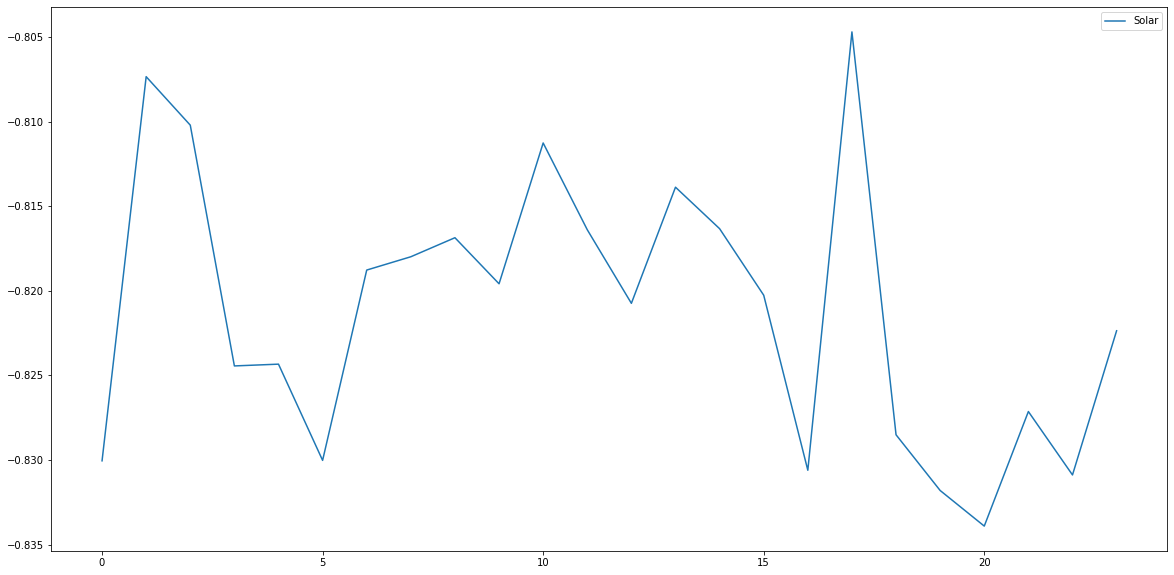

In [11]:
# Plot one example 
example = x_train[0]
demanda = example[:, 0]
precio = example[:, 1]
eolica = example[:, 2]
solar = example[:, 3]

# Plot every time serie in the same plot
plt.figure(figsize=(20,10))
#plt.plot(demanda, label="Demanda")
#plt.plot(precio, label="Precio")
#plt.plot(eolica, label="Eolica")
plt.plot(solar, label="Solar")
plt.legend()
plt.savefig("data_exploration.png")

In [10]:
import numpy as np

In [31]:
a = np.random.rand(10, 4)
a.shape

(10, 4)

In [33]:
means = np.mean(a, axis=0)
stds = np.std(a, axis=0)
means


array([0.40537673, 0.65846368, 0.59440558, 0.4910093 ])

In [34]:
# Normalization
an = (a - means) / stds
an.shape

(10, 4)

In [35]:
np.mean(an, axis=0), np.std(an, axis=0)

(array([-4.44089210e-16, -1.99840144e-16,  2.10942375e-16,  1.33226763e-16]),
 array([1., 1., 1., 1.]))

In [39]:
# Read csv 
import pandas as pd
import numpy as np

df = pd.read_csv("../data/electricSystem/Other/electricity.csv")

# Divide into train and test
train = df.iloc[:int(len(df)*0.8)]
test = df.iloc[int(len(df)*0.8):]

# Save to csv
train.to_csv("../data/electricSystem/electricity_train.csv", index=False)
test.to_csv("../data/electricSystem/electricity_test.csv", index=False)

In [1]:
# Unir electricity_train.csv y electricity_test.csv en electricity.csv

# Read csv
import pandas as pd
import numpy as np

df_train = pd.read_csv("../data/electricSystem/electricity_train.csv")
df_test = pd.read_csv("../data/electricSystem/electricity_test.csv")

df = pd.concat([df_train, df_test], axis=0)

# Save to csv
#df.to_csv("../data/electricSystem/electricity.csv", index=False)


In [7]:
# Leer mibgas archivos 
m2021 = pd.read_csv("../data/electricSystem/MIBGAS_Data_2021.csv")
m2022 = pd.read_csv("../data/electricSystem/MIBGAS_Data_2022.csv")

# Unirlos
m = pd.concat([m2021, m2022], axis=0)

# Filtrar por solo el valor GDAES_D+1 de la columna Product
m = m[m["Product"] == "GDAES_D+1"]

# Guardar en csv
m.to_csv("../data/electricSystem/mibgas.csv", index=False)

In [13]:
# Leer mibgas csv
import pandas as pd
import numpy as np

m = pd.read_csv("../data/electricSystem/mibgas.csv")

# Convertir index a tipo date (formato d/m/Y)
m["Trading day"] = pd.to_datetime(m["Trading day"])

# Ordenar por fecha 
m = m.sort_values(by=["Trading day"])

# Repetir cada fila 24 veces y añadir indice de tipo datetime con las horas de cada dia 
m = m.loc[m.index.repeat(24)].reset_index(drop=True)
m["Trading day"] = pd.to_datetime(m["Trading day"])
m["Trading day"] = m["Trading day"] + pd.to_timedelta(m.groupby("Trading day").cumcount(), unit="h")


# Guardar en csv
m.to_csv("../data/electricSystem/mibgas_horaa.csv", index=False)

In [33]:
# Duplicar una fila del dataframe m 

m = pd.read_csv("../data/electricSystem/mibgas.csv")
m = m["Precio_gas"].repeat(24)
m = m.reset_index(drop=True)

# Guardar en csv
m.to_csv("../data/electricSystem/mibgas2.csv", index=False)

In [34]:
print(len(m.values), len(df.values))

17544 17520


In [6]:
# Añadir como columna a df dataframe 
df["Precio_gas"] = m.values

# Dividir en train y test
train = df.iloc[:int(len(df)*0.8)]
test = df.iloc[int(len(df)*0.8):]

# Guardar en csv
train.to_csv("../data/electricSystem/electricity_train2.csv", index=False)
test.to_csv("../data/electricSystem/electricity_test2.csv", index=False)

ValueError: Length of values (51888) does not match length of index (17520)

In [6]:
# Read json file 
import json
import pandas as pd
import numpy as np

with open("../data/electricSystem/tiempo/sevilla.json") as f:
    data = json.load(f)
    # Convert to dataframe
    df_sev = pd.DataFrame(data)

# Igual para el resto de ciudades (barcelona, madrid, valencia)
with open("../data/electricSystem/tiempo/barcelona.json") as f:
    data = json.load(f)
    # Convert to dataframe
    df_bar = pd.DataFrame(data)

with open("../data/electricSystem/tiempo/madrid.json") as f:
    data = json.load(f)
    # Convert to dataframe
    df_mad = pd.DataFrame(data)

with open("../data/electricSystem/tiempo/valencia.json") as f:
    data = json.load(f)
    # Convert to dataframe
    df_val = pd.DataFrame(data)


# Guardar todos en csv
df_sev.to_csv("../data/electricSystem/tiempo/sevilla.csv", index=False)
df_bar.to_csv("../data/electricSystem/tiempo/barcelona.csv", index=False)
df_mad.to_csv("../data/electricSystem/tiempo/madrid.csv", index=False)
df_val.to_csv("../data/electricSystem/tiempo/valencia.csv", index=False)


In [13]:
# Read csvs from folder tiempo 
import pandas as pd
import numpy as np

df_sev = pd.read_csv("../data/electricSystem/tiempo/sevilla.csv")
df_bar = pd.read_csv("../data/electricSystem/tiempo/barcelona.csv")
df_mad = pd.read_csv("../data/electricSystem/tiempo/madrid.csv")
df_val = pd.read_csv("../data/electricSystem/tiempo/valencia.csv")

# INDEX -> fecha 
df_sev["fecha"] = pd.to_datetime(df_sev["fecha"])
df_bar["fecha"] = pd.to_datetime(df_bar["fecha"])
df_mad["fecha"] = pd.to_datetime(df_mad["fecha"])
df_val["fecha"] = pd.to_datetime(df_val["fecha"])


# Unirlos en un solo dataframe
df = pd.concat([df_sev, df_bar, df_mad, df_val], axis=1)

# Guardar en csv
#df.to_csv("../data/electricSystem/tiempo/tiempo.csv")
# ver valores nulos
df.isnull().sum()

# Rellenar valores nulos con el valor anterior en cada columna 
df = df.fillna(method="ffill")

df.isnull().sum()

# Guardar en csv
df.to_csv("../data/electricSystem/tiempo/tiempo2.csv", index=False)


In [14]:
# Leer csv tiempo2 
df = pd.read_csv("../data/electricSystem/tiempo/tiempo2.csv")

# Ordenar por fecha 
df = df.sort_values(by=["fecha"])

# Repetir cada fila 24 veces y añadir indice de tipo datetime con las horas de cada dia 
df = df.loc[df.index.repeat(24)].reset_index(drop=True)
df["fecha"] = pd.to_datetime(df["fecha"])
df["fecha"] = df["fecha"] + pd.to_timedelta(df.groupby("fecha").cumcount(), unit="h")

# Guardar en csv
df.to_csv("../data/electricSystem/tiempo/tiempo_horaa.csv", index=False)

In [46]:
# Leer tiempo csv 
import pandas as pd
import numpy as np

df = pd.read_csv("../data/electricSystem/tiempo.csv", decimal=',')

# Guardar en csv
df.to_csv("../data/electricSystem/tiempo2.csv", index=False)

In [47]:
# Leer csv electricity train y test y unirlos 
import pandas as pd
import numpy as np

df_elec = pd.read_csv("../data/electricSystem/electricity.csv")
df_mibgas = pd.read_csv("../data/electricSystem/mibgas.csv")
df_tiempo = pd.read_csv("../data/electricSystem/tiempo.csv")


# Unirlos en un solo dataframe
df2 = pd.concat([df_elec, df_mibgas, df_tiempo], axis=1)

# Guardar en csv
df2.to_csv("../data/electricSystem/datasett.csv", index=False)


In [48]:

dataset = pd.read_csv("../data/electricSystem/datasett.csv")
dataset = dataset.set_index("datetime")
dataset.index = pd.to_datetime(dataset.index)


# Add hour as variable
dataset['hour'] = dataset.index.to_series().apply(lambda x: x.hour)
dataset['hour_sin'] = np.sin(dataset['hour'] / 23 * 2 * np.pi)
dataset['hour_cos'] = np.cos(dataset['hour'] / 23 * 2 * np.pi)

# Add day of week as variable
dataset['dayofweek'] = dataset.index.to_series().apply(lambda x: x.dayofweek)
dataset['dayofweek_sin'] = np.sin(dataset['dayofweek'] / 6 * 2 * np.pi)
dataset['dayofweek_cos'] = np.cos(dataset['dayofweek'] / 6 * 2 * np.pi)

# Drop hour and dsay of week columns
dataset = dataset.drop(columns=['hour', 'dayofweek'])

# Put target variable at the end (variable Precio)
cols = list(dataset.columns)
cols.remove('Precio')
cols.append('Precio')

# INsert first column datetime 
cols.insert(0, 'datetime.1')
dataset = dataset[cols]

# Save to csv
dataset.to_csv("../data/electricSystem/dataset.csv", index=False)